<a href="https://colab.research.google.com/github/patty149/ECONOMICANALYSIS/blob/main/EconomicAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fredapi > /dev/null

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

In [ ]:
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]


**IMPORTING FRED API AND CHECKING OUT THE DATA FOR S&P 500**

In [ ]:
from fredapi import Fred
fred_key = 'your_key_here'

In [ ]:
fred = Fred(api_key=fred_key)

In [ ]:
sp_search = fred.search('S&P', order_by='popularity')

In [ ]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-10-17,2024-10-17,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-10-16,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-10-17 09:08:37-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-10-17,2024-10-17,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-07-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-09-25 10:50:02-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-10-17,2024-10-17,S&P 500,2014-10-20,2024-10-17,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-10-17 19:44:50-05:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-10-17,2024-10-17,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-10-16,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-10-17 09:08:40-05:00,82,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2024-10-17,2024-10-17,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2024-10-16,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-10-17 09:15:02-05:00,78,The ICE BofA Option-Adjusted Spreads (OASs) ar...


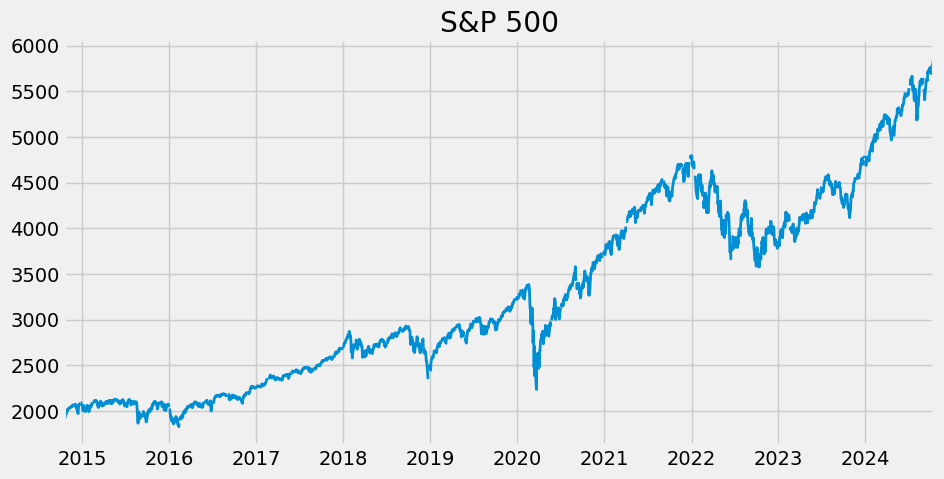

In [ ]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)
plt.show()

**FILTERING OUT UNEMPLOYED DATA **

In [ ]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [ ]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1)
uemp_results = pd.concat(all_results, axis=1)

In [ ]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [ ]:
uemp_states = uemp_results.copy()
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [ ]:
px.line(uemp_states)

**UNEMPLOYMENT DATA DURING COVID TIME**

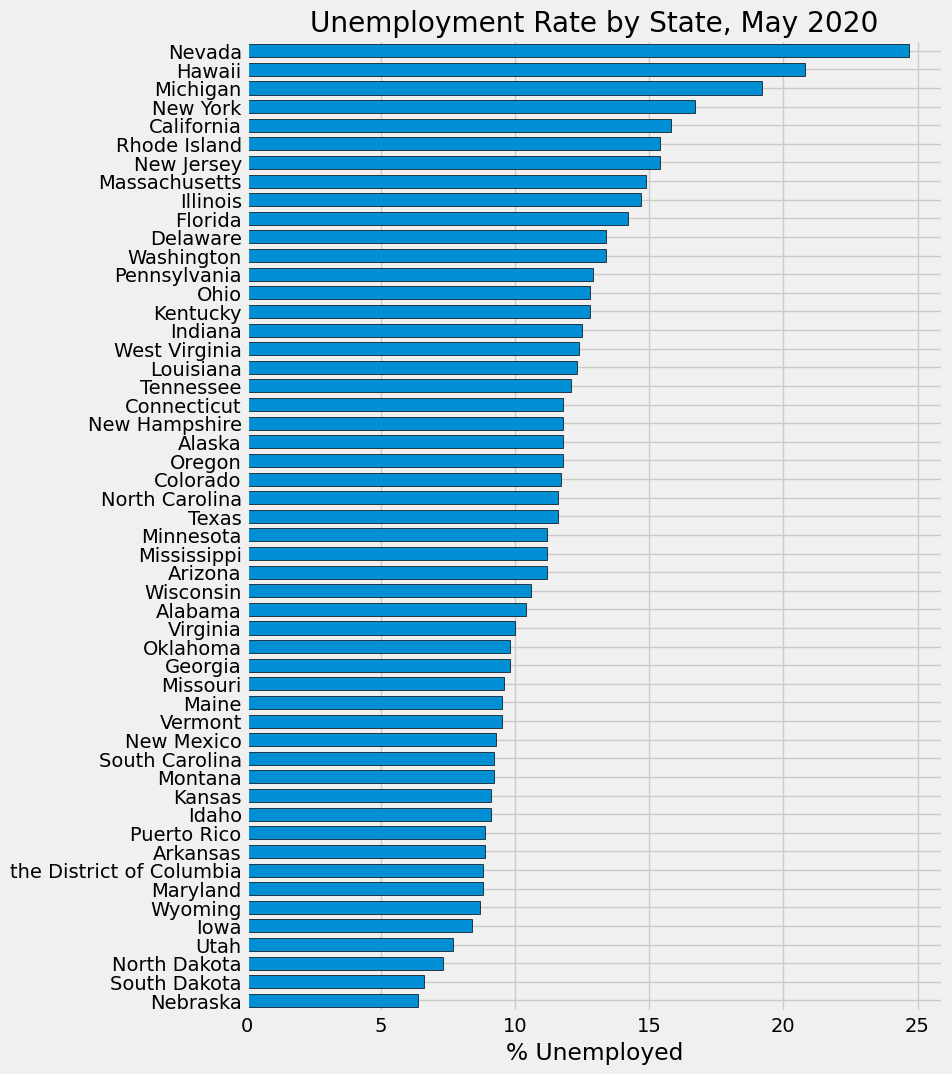

In [ ]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

**PARTICIPATION RATE**

In [ ]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [ ]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1)
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [ ]:
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

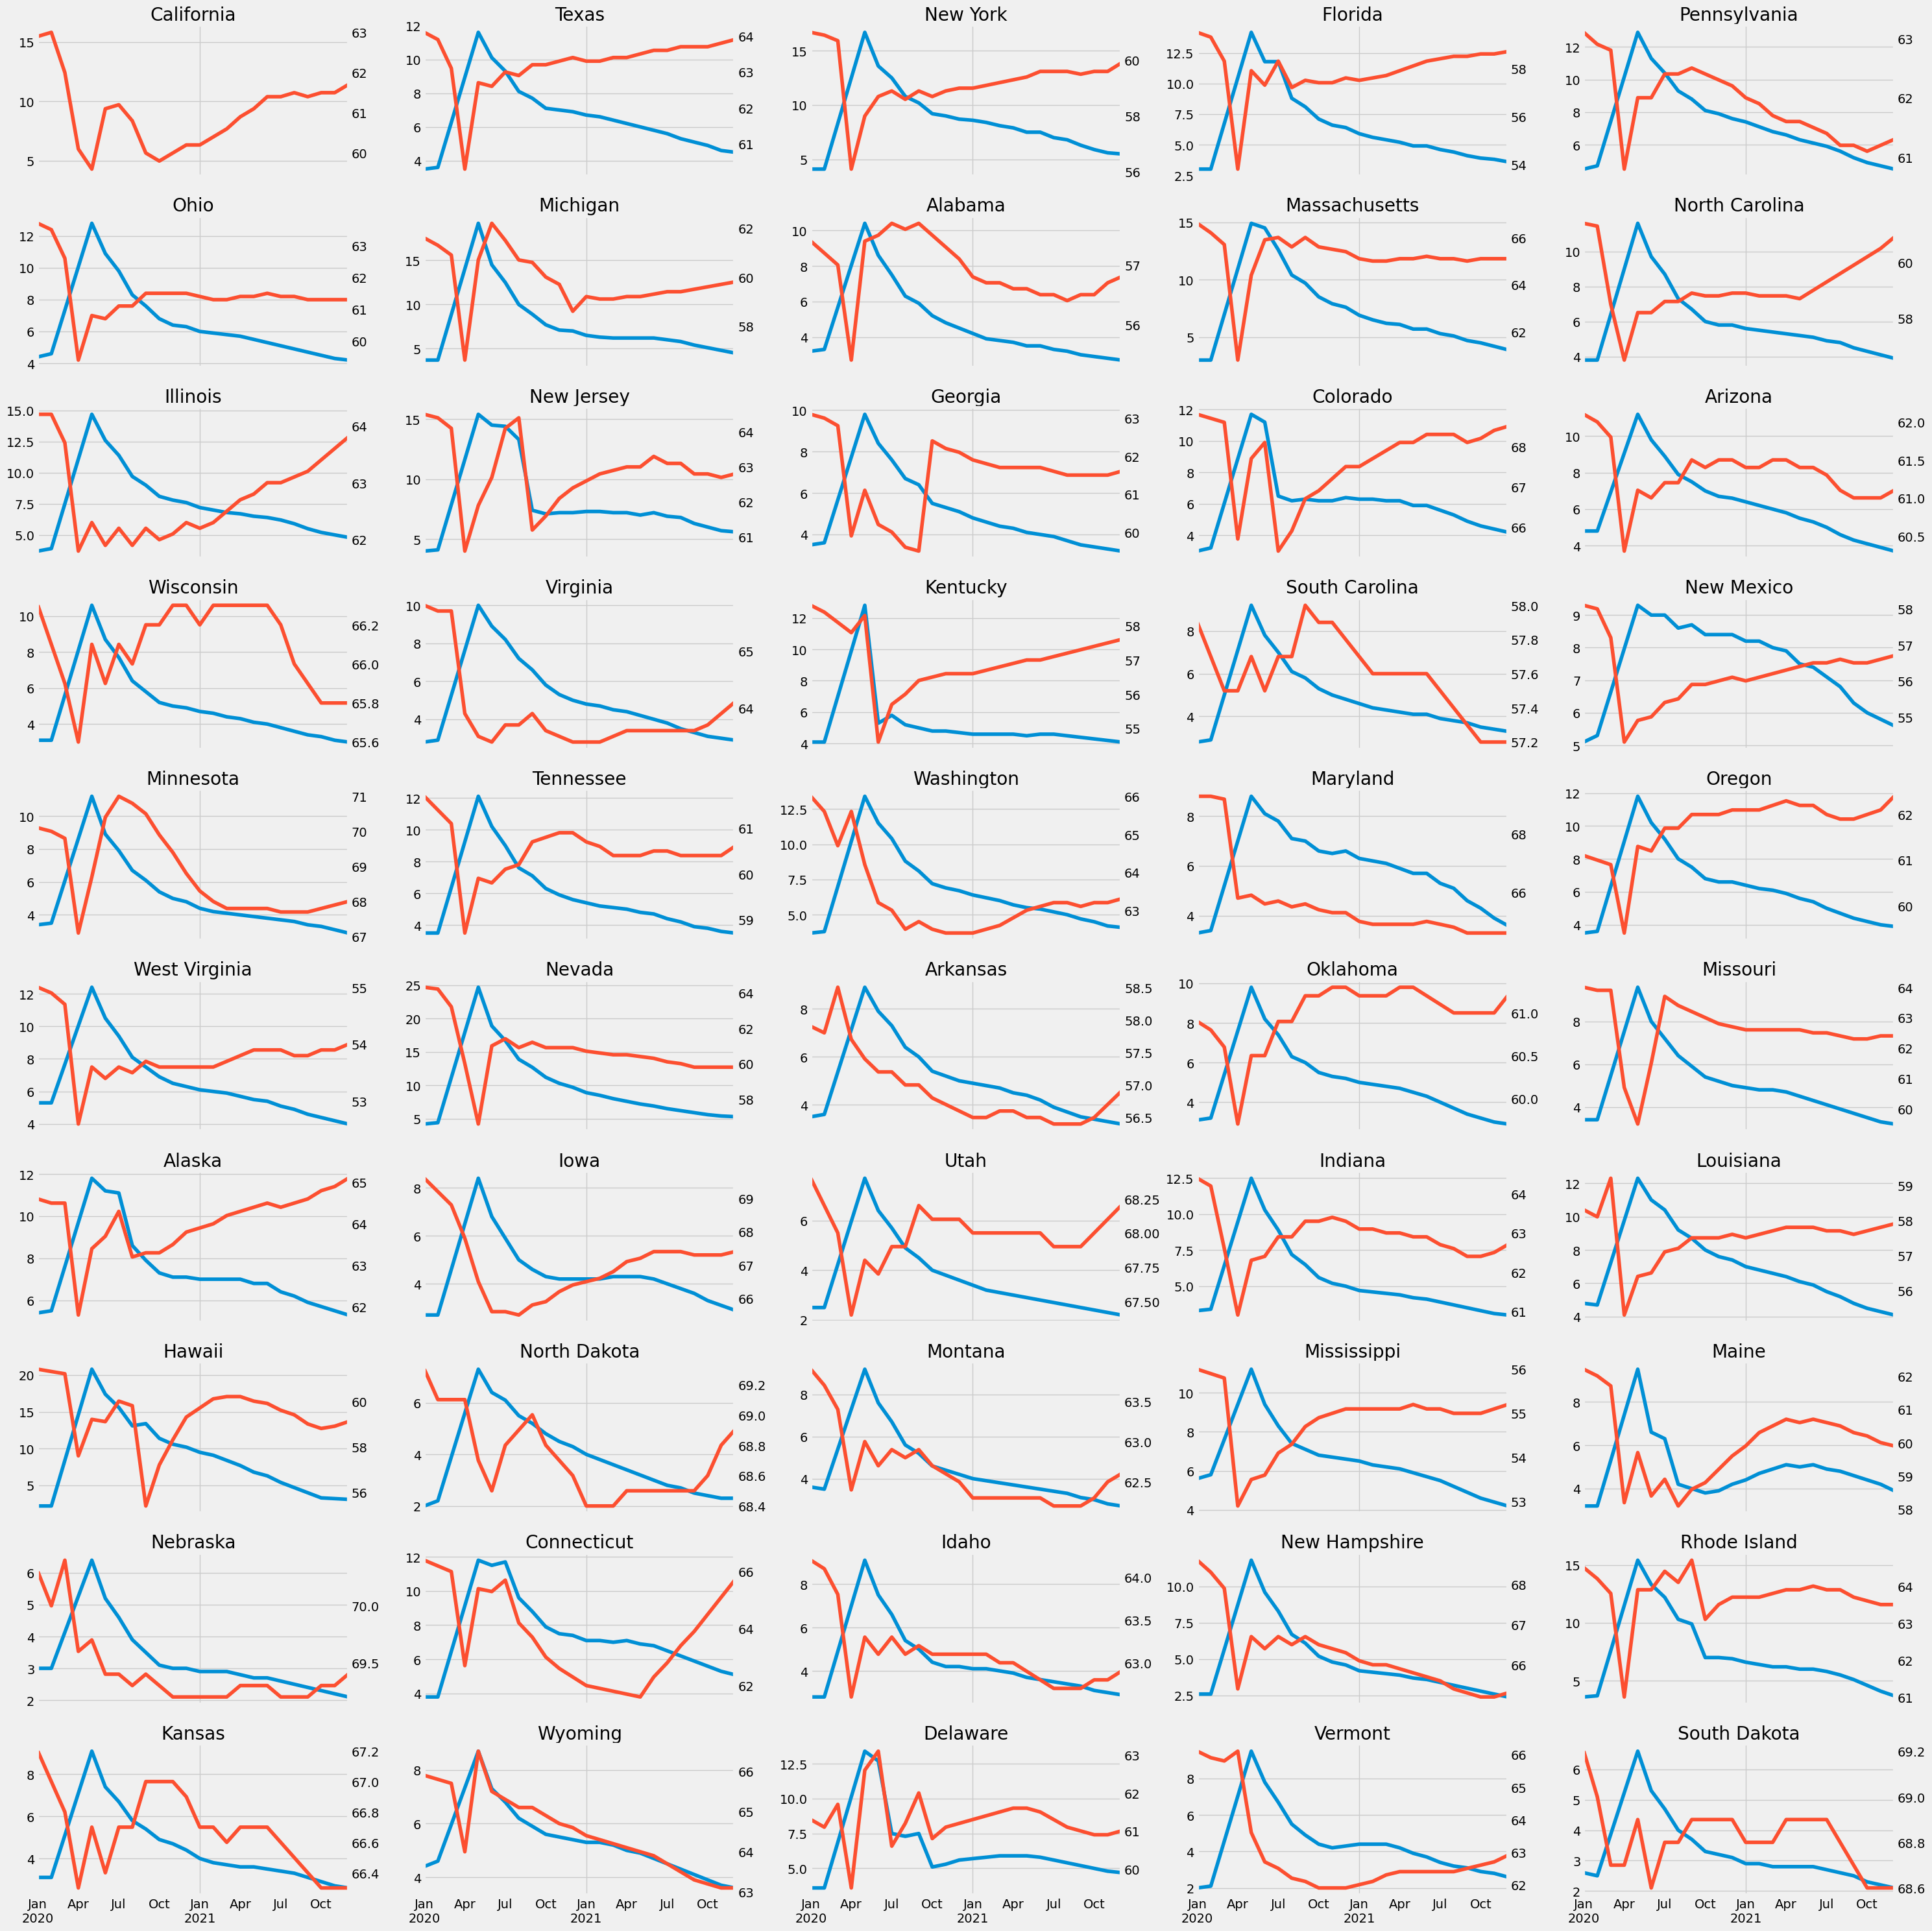

In [ ]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

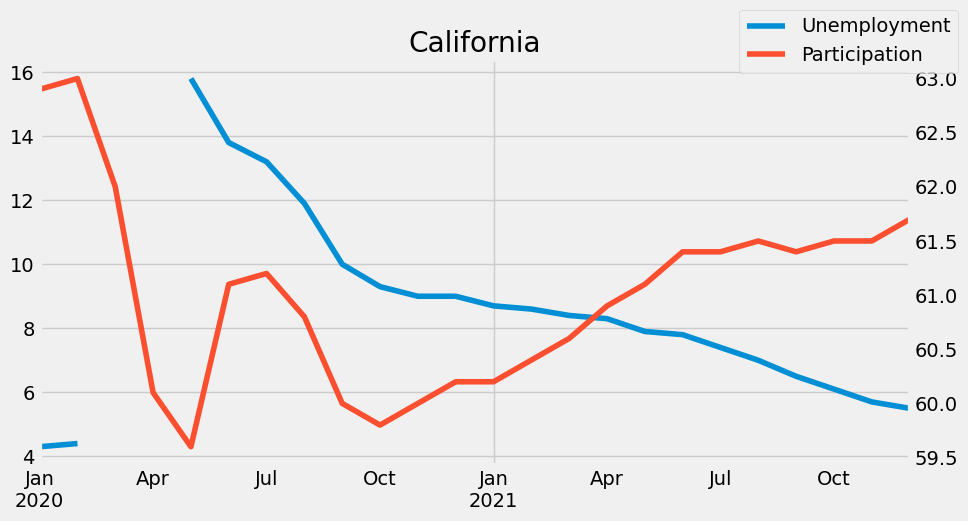

In [ ]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()


**CLUSTERING THE STATES BASED**

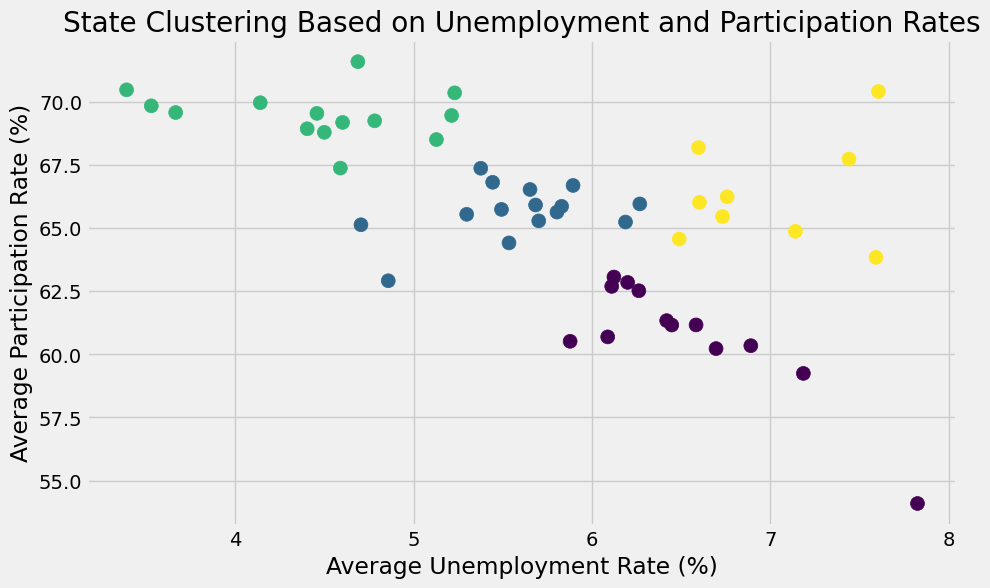

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


combined_states = pd.concat([uemp_states.mean(), part_states.mean()], axis=1, keys=['Unemployment', 'Participation'])
combined_states = combined_states.dropna()


scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_states)


kmeans = KMeans(n_clusters=4, random_state=42)
combined_states['Cluster'] = kmeans.fit_predict(scaled_data)


plt.figure(figsize=(10, 6))
plt.scatter(combined_states['Unemployment'], combined_states['Participation'],
            c=combined_states['Cluster'], cmap='viridis', s=100)
plt.title('State Clustering Based on Unemployment and Participation Rates')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('Average Participation Rate (%)')
plt.show()


**FORECASTING UNEMPLOYMENT RATE**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the 

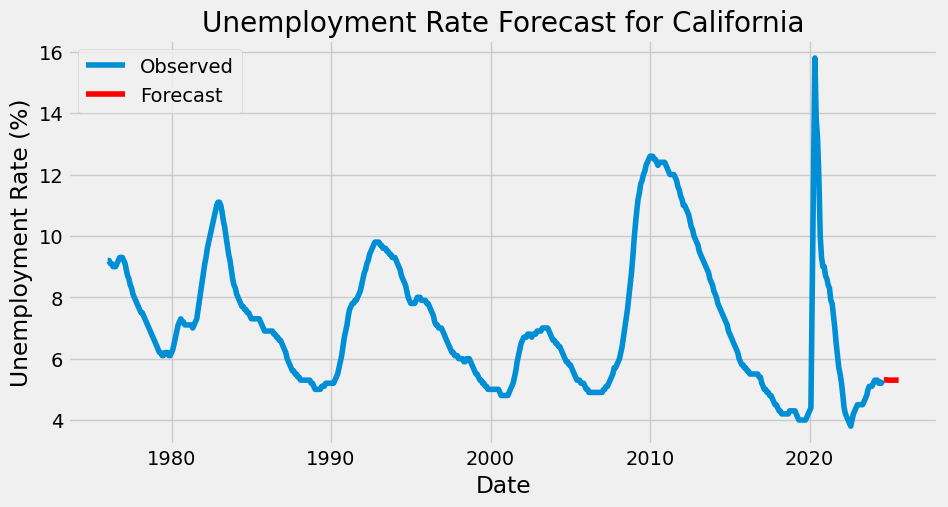

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

state = 'California'

model = ARIMA(uemp_states[state], order=(5, 1, 0))
model_fit = model.fit()

forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

last_date = uemp_states.index[-1]
forecast_index = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='MS')[1:]

plt.figure(figsize=(10, 5))
plt.plot(uemp_states[state], label='Observed')

plt.plot(forecast_index, forecast, label='Forecast', color='red')

plt.title(f'Unemployment Rate Forecast for {state}')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()

plt.show()
